Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

Q2. Load the Wine Quality dataset and explore its dimensions. 

Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
Q3. Check for null values, identify categorical variables, and encode them.

Q4. Separate the features and target variables from the dataset.

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

Q6. Scale the dataset using an appropriate scaling technique.

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical 
variables.

Q8. Create a Sequential model in Keras and add the previously designed layers to it.

Q9. Print the summary of the model architecture.

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

Q11. Compile the model with the specified loss function, optimizer, and metrics.

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

Q13. Obtain the model's parameters (weights and biases).

Q14. Store the model's training history as a Pandas DataFrame.

Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [1]:
# Install the latest versions of TensorFlow and Keras
!pip install tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 79.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 56.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.4/181.4 kB 29.1 MB/s eta 0:00

In [4]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.0
Keras version: 2.13.1


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("wine.csv")

# Explore dataset dimensions
print("Dataset shape:", data.shape)


Dataset shape: (1599, 12)


In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [7]:
# Check for null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# there is not any null value in this dataset

In [8]:
print(data.info())

# Encode categorical variables (if any)
# Example: data_encoded = pd.get_dummies(data, columns=["categorical_column"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB
None


In [9]:
# Encode categorical variables 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['quality'] = label_encoder.fit_transform(data['quality'])


In [10]:
# Separate features (X) and target variable (y)
X = data.drop("quality", axis=1)
y = data["quality"]


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [13]:
data['quality'].unique()

array([0, 1])

In [14]:
X_train.shape

(1279, 11)

In [15]:
#  Design and Implement Neural Network Layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add hidden layers (e.g., 2 hidden layers with 64 units and ReLU activation)
model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))

# Add output layer (e.g., for binary classification)
model.add(Dense(1, activation='sigmoid'))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/engine/data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


86/86 [==============================] - 1s 6ms/step - loss: 0.7265 - accuracy: 0.5491 - val_loss: 0.7006 - val_accuracy: 0.5272
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5678 - val_loss: 0.6764 - val_accuracy: 0.5626
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.5841 - val_loss: 0.6663 - val_accuracy: 0.5508
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.5818 - val_loss: 0.6815 - val_accuracy: 0.5556
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6016 - val_loss: 0.6439 - val_accuracy: 0.6052
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6133 - val_loss: 0.6508 - val_accuracy: 0.5981
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6121 - val_loss: 0.6539 - val_accuracy: 0.6099
Epoch 8/50
86/86 [=============

In [19]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

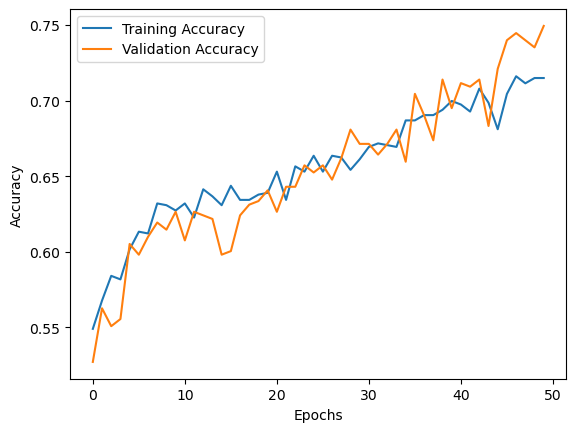

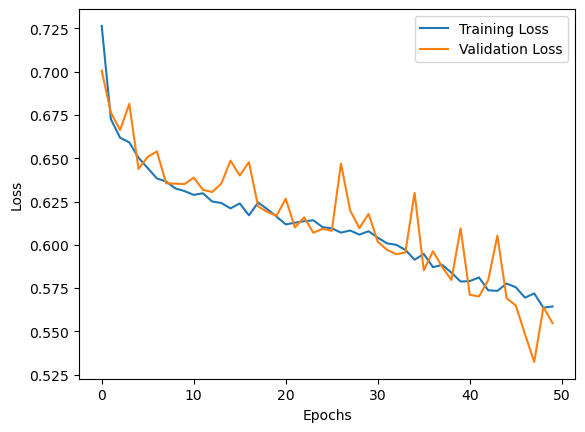

In [34]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<AxesSubplot: >

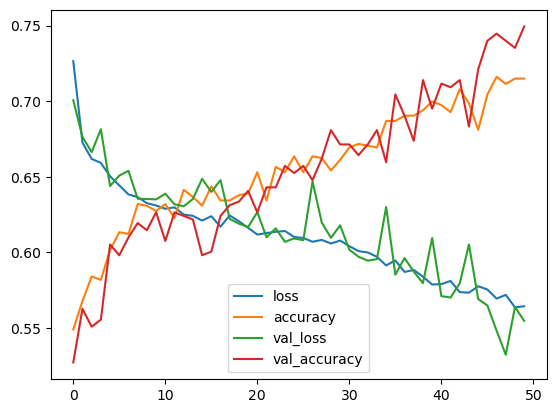

In [23]:
pd.DataFrame(model_history.history).plot()

In [24]:
# making the predictions and evaluating the model
# predicting the test set results
y_pred=model.predict(X_test)
y_pred= (y_pred>=0.5)

10/10 [==============================] - 0s 2ms/step


In [25]:
# make the confusion matricx
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,  35],
       [ 57, 122]])

In [26]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score*100

71.25

In [30]:
model.get_weights()

[array([[ 0.4179994 , -0.22016573, -0.03969207, -0.34679595,  0.01330614,
          0.39527974, -0.33362365,  0.35782427,  0.2532968 , -0.2212882 ,
          0.16463876],
        [-0.47748467, -0.15265566,  1.2877164 ,  0.08292632, -1.1051611 ,
          0.33711043,  0.13622856,  0.46663302, -0.5833595 ,  0.3452382 ,
          0.42366165],
        [-0.2303897 ,  0.06386723,  0.08078764,  0.3985911 ,  0.12764129,
         -0.5462112 ,  0.49664527, -0.46030328, -0.00683702, -0.0083077 ,
         -0.87537485],
        [ 0.31066418,  0.4851026 ,  0.43259218, -0.06581289,  0.33998337,
         -0.1501149 ,  0.2709549 , -0.13424417, -0.36186135,  0.4094398 ,
          0.21267854],
        [ 0.25621384,  0.17473824, -0.11727323,  0.8338266 ,  0.15448394,
         -0.14701475,  0.16928089,  0.43410152, -0.7105829 ,  0.30039936,
          0.7080228 ],
        [ 0.21479376,  0.21792032, -0.54635614, -0.19440952, -0.16082649,
         -0.36941233, -0.0466544 , -0.5182319 , -0.31162304,  0.0314337